# Linear Regression 

## import library

In [36]:
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.mplot3d import Axes3D

## load point data 

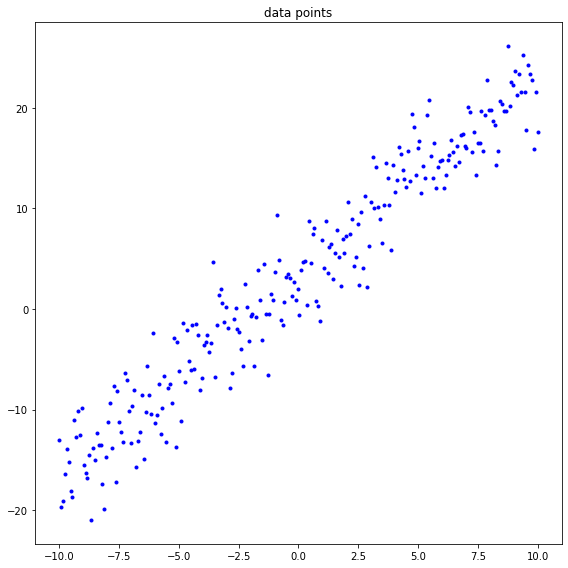

In [37]:
filename    = 'assignment_06_data.csv'
data_load   = np.loadtxt(filename, delimiter = ',')

x   = data_load[0, :]
y   = data_load[1, :]

plt.figure(figsize=(8,8))

plt.plot(x, y, '.', color = 'blue')
plt.title('data points')

plt.tight_layout()
plt.show()

## compute the loss function

In [38]:
def compute_loss(x, y, theta0, theta1):

    front = (1 / (x.shape[0]))
    sum = 0
    for i in range(x.shape[0]):
        sum += pow(theta0 + theta1 * x[i] - y[i], 2)
        
    loss = front * sum
    
    return loss

## compute the gradient for each model parameter

In [39]:
def compute_gradient_theta0(x, y, theta0, theta1):
    
    dL = (2 / x.shape[0])
    sum = 0
    for i in range(x.shape[0]):
        sum += (theta0 + theta1 * x[i] - y[i])

    dL = dL * sum
    
    return dL

In [40]:
def compute_gradient_theta1(x, y, theta0, theta1):

    dL = (2 / x.shape[0])
    sum = 0
    for i in range(x.shape[0]):
        sum += (theta0 + theta1 * x[i] - y[i]) * x[i]

    dL = dL * sum

    return dL

## gradient descent for each model parameter

In [41]:
num_iteration       = 1000
learning_rate       = 0.01

theta0              = 0
theta1              = 0

theta0_iteration    = np.zeros(num_iteration)
theta1_iteration    = np.zeros(num_iteration)
loss_iteration      = np.zeros(num_iteration)

for i in range(num_iteration):

    theta0  = theta0 - learning_rate * compute_gradient_theta0(x, y, theta0, theta1)
    theta1  = theta0 - learning_rate * compute_gradient_theta1(x, y, theta0, theta1)
    loss    = compute_loss(x, y, theta0, theta1)

    theta0_iteration[i] = theta0
    theta1_iteration[i] = theta1
    loss_iteration[i]   = loss

    print("iteration = %4d, loss = %5.5f" % (i, loss))

iteration =    0, loss = 30.69844
iteration =    1, loss = 90.81644
iteration =    2, loss = 40.54989
iteration =    3, loss = 65.56556
iteration =    4, loss = 43.47234
iteration =    5, loss = 52.86152
iteration =    6, loss = 42.37319
iteration =    7, loss = 45.12457
iteration =    8, loss = 39.57308
iteration =    9, loss = 39.62429
iteration =   10, loss = 36.25540
iteration =   11, loss = 35.28560
iteration =   12, loss = 32.94307
iteration =   13, loss = 31.65405
iteration =   14, loss = 29.84490
iteration =   15, loss = 28.52256
iteration =   16, loss = 27.03141
iteration =   17, loss = 25.78661
iteration =   18, loss = 24.51492
iteration =   19, loss = 23.38569
iteration =   20, loss = 22.28449
iteration =   21, loss = 21.27904
iteration =   22, loss = 20.32069
iteration =   23, loss = 19.43542
iteration =   24, loss = 18.60177
iteration =   25, loss = 17.82874
iteration =   26, loss = 17.10616
iteration =   27, loss = 16.43621
iteration =   28, loss = 15.81342
iteration =   

In [23]:
f = np.zeros(x.shape[0])
for i in range(x.shape[0]):
    f[i] = 0.9210205738337967 + 0.9268561489624869 * x[i]

## plot the results

In [27]:
def plot_data_regression(x, y, f):

    plt.figure(figsize=(8,6))
    plt.plot(x, y, '.', color = 'blue')
    plt.plot(x, f, '-', color = 'red')
    plt.title('linear regression result')

    
    plt.tight_layout()
    plt.show()

In [35]:
def plot_loss_curve(loss_iteration):

    plt.figure(figsize=(8,6))
    plt.plot(loss_iteration, '-', color = 'red')
    plt.title('loss curve')

    
    plt.tight_layout()
    plt.show()

In [50]:

def plot_model_parameter(theta0_iteration, theta1_iteration):

    plt.figure(figsize=(8,6))
    plt.plot(theta0_iteration, '-', color = 'blue')
    plt.plot(theta1_iteration, '-', color = 'green')
    plt.title('model parameter')


    plt.tight_layout()
    plt.show()

200


In [79]:

X0  = np.arange(-10, 10, 0.1)
X1  = np.arange(-10, 10, 0.1)

grid_theta0, grid_theta1 = np.meshgrid(X0,X1)
sum = np.arange(-10, 10, 0.1)
R = (1 / x.shape[0])
for i in range(len(X0)):
    for j in range(x.shape[0]):
        sum[i] += pow(X0[i] + X1[i] * x[j] - y[j], 2)
    sum[i] = R * sum[i]

grid_loss = sum
grid_loss = np.asmatrix(grid_loss)
grid_loss = grid_loss.T

def plot_loss_surface(grid_theta0, grid_theta1, grid_loss):
    fig = plt.figure(figsize=(8,6))
    ax3d = plt.axes(projection="3d")

    ax3d = plt.axes(projection='3d')
    ax3d.plot_surface(grid_theta0, grid_theta1, grid_loss ,cmap='plasma')
    plt.show()

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

# * results

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

### # 01. plot the input data in blue point and the regression result in red curve

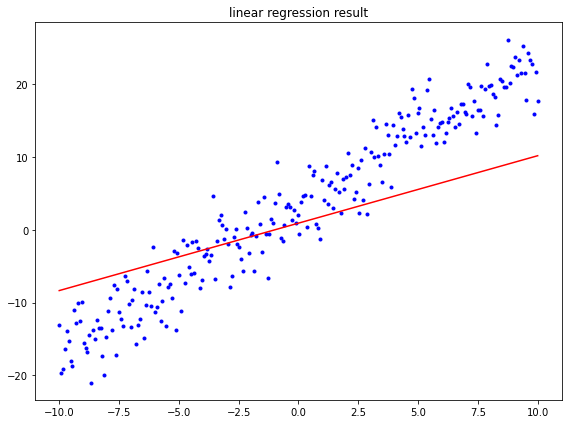

In [80]:
plot_data_regression(x, y, f)

### # 02. plot the values of the model parameters $\theta_0$ in blue and $\theta_1$ in green over the gradient descent iterations

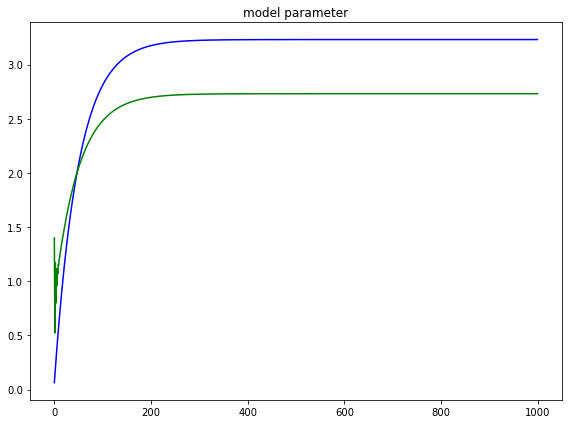

In [81]:
plot_model_parameter(theta0_iteration, theta1_iteration)

### # 03. plot the loss values $\mathcal{L}(\theta)$ in red over the gradient descent iterations

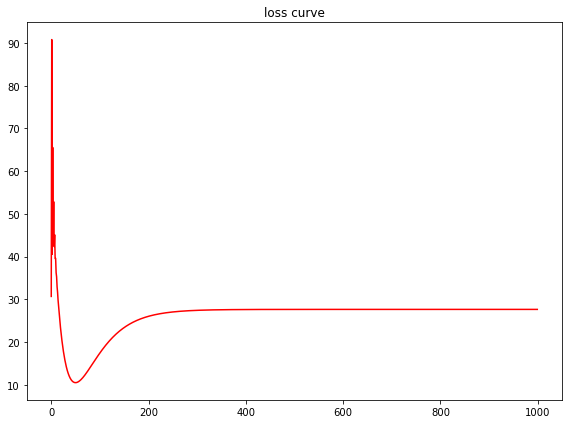

In [82]:
plot_loss_curve(loss_iteration)

### # 04. plot the loss surface in 3-dimension where $x$-axis represents $\theta_0$, $y$-axis represents $\theta_1$ and $z$-axis represents $\mathcal{L}$

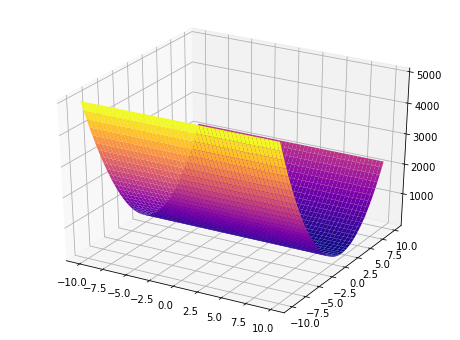

In [83]:
plot_loss_surface(grid_theta0, grid_theta1, grid_loss)